<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/transformaciones_ajustes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Transformaciones y ajustes
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 18 de septiembre 2024 <br>

* * *

<br>
<br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp
import yfinance as yf

In [241]:
stocks = ['BTC-USD']
data = yf.download(stocks, start='2018-01-01', interval='1mo')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [162]:
data.var()

389376823.77028465

In [163]:
data.std()

19732.633472759906

In [164]:
data.skew()

0.6789208917218094

In [165]:
sp.stats.skew(data, bias=False), sp.stats.skew(data)

(0.6789208917218094, 0.6662830441863581)

<Axes: >

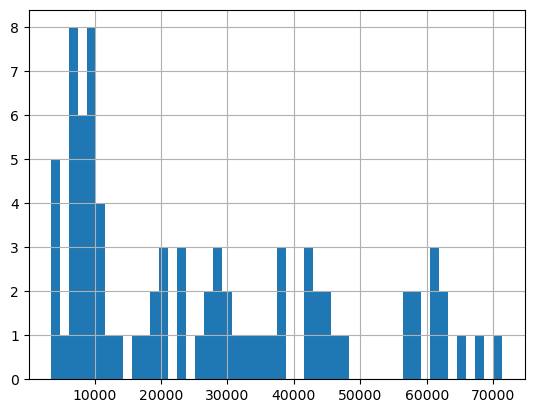

In [166]:
data.hist(bins=50)

Se observa una Concentracion a la izquierda debido a que la gran parte de valores se encuentran de ahi antes de cambiar tendencia

<Axes: xlabel='Date'>

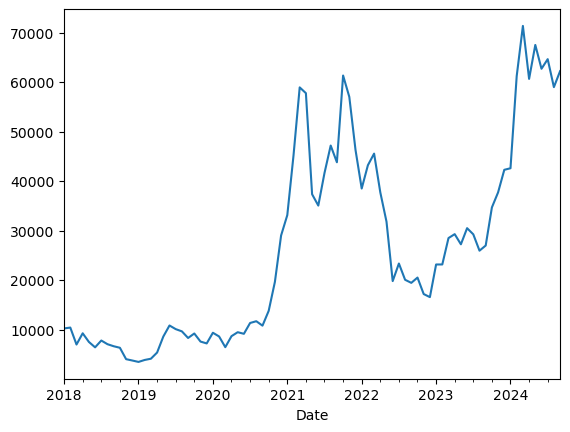

In [178]:
data.plot()

# Transformaciones y ajustes

A menudo, el ajuste de los datos históricos puede dar lugar a series de tiempo más sencillas.

El objetivo de estos ajustes y transformaciones es simplificar los patrones de los datos históricos eliminando las fuentes de variación conocidas o haciendo que el patrón sea más coherente en todo el conjunto de datos. Las pautas más simples suelen ser más fáciles de modelizar y conducen a previsiones más precisas.

Matemáticamente una variable más sencilla tiene una variación más pequeña, sesgo cercado a 0, sin colas a la derecha o izquierda de la distribución, sin valores atípicos, una magnitud similar; sin perder información valiosa.

Esto se puede lograr a partir de diferentes tranformaciones o ajustes. Vamos a analizar algunas.

Utiliza tu serie de tiempo. Decide que transformaciones y ajustes son mejores para tu variable.

Utiliza como comparación el sesgo (una distribución normal tiene sesgo 0) la varianza (o desviación estándar). Complementa visualmente con el histograma (o función de densidad de probabilidad)

## Elimina valores antiguos que no representan la actualidad

In [179]:
data["2010-01-01":].skew()

0.6789208917218094

In [180]:
data["2010-01-01":].std()

19732.633472759906

<Axes: xlabel='Date'>

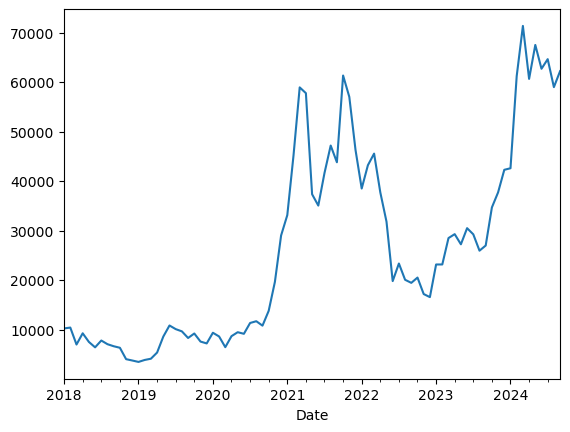

In [181]:
data["2010-01-01":].plot()

<Axes: >

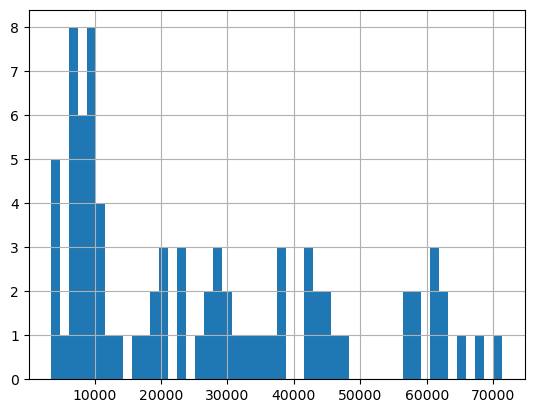

In [182]:
data["2010-01-01":].hist(bins=50)

## Diferenciación

In [183]:
data.diff().skew()

0.04557585959620664

<Axes: xlabel='Date'>

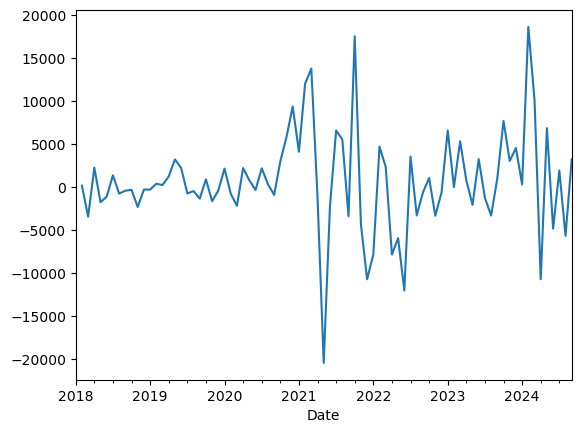

In [184]:
data.diff().plot()

Valor atipico en 2021, 2022 y 2024

<Axes: >

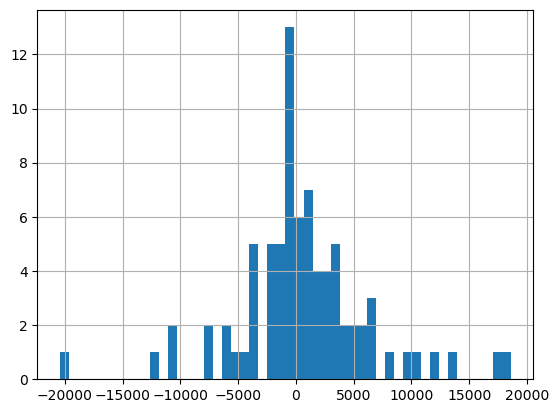

In [185]:
data.diff().hist(bins=50)

Tiene una mayor tendencia a no tener valores atipicos

### Retornos

In [186]:
data.pct_change().skew()

0.3872387633480262

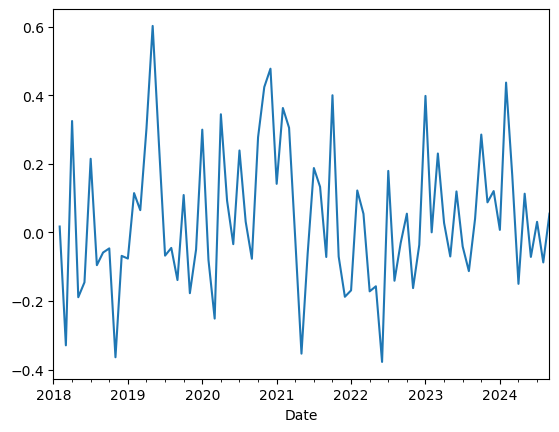

In [187]:
ati = data.pct_change().plot()

Valores atipicos en 2018, 2019, 2021, 2022-2023

<Axes: >

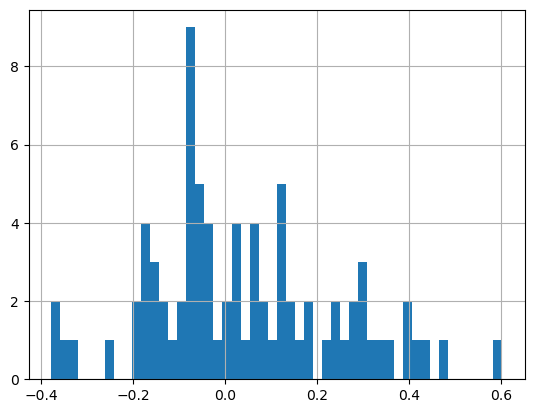

In [188]:
data.pct_change().hist(bins=50)

Tiende a tener un mayor cambio porcentual negativo

## Escalamiento y Desplazamiento

### Escalamiento valores máximo y mínimo

$$
Y=\frac{X-\min(X)}{\max(X)-\min(X)}
$$

In [189]:
from sklearn.preprocessing import MinMaxScaler

In [190]:
mM=MinMaxScaler()
Z = mM.fit_transform(data.values.reshape(-1,1))

In [191]:
sp.stats.skew(Z, bias=False)

array([0.67892089])

In [192]:
Z.std()

0.28891641369383253

In [193]:
Z.mean()

0.3365642101661577

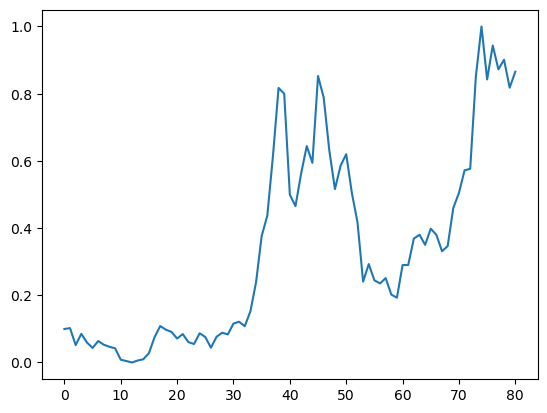

In [194]:
plt.plot(Z)

(array([5., 1., 8., 6., 8., 4., 1., 1., 0., 1., 1., 2., 3., 0., 3., 0., 1.,
        2., 3., 2., 1., 1., 1., 1., 1., 3., 0., 0., 3., 2., 2., 1., 1., 0.,
        0., 0., 0., 0., 0., 2., 2., 0., 3., 2., 0., 1., 0., 1., 0., 1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

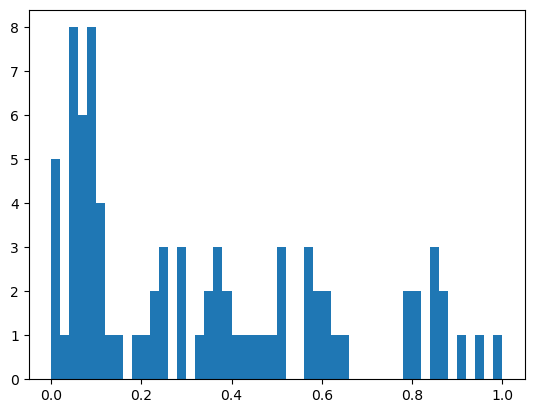

In [195]:
plt.hist(Z, bins=50)

### Desplazamiento

In [196]:
Z = Z + 1 # si quieres desplazar, en éste caso mayor a 1

In [197]:
sp.stats.skew(Z, bias=False)

array([0.67892089])

In [198]:
Z.std()

0.28891641369383253

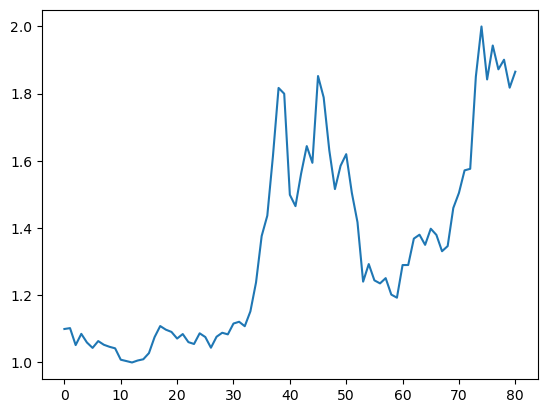

In [199]:
plt.plot(Z)

(array([5., 1., 8., 6., 8., 4., 1., 1., 0., 1., 1., 2., 3., 0., 3., 0., 1.,
        2., 3., 2., 1., 1., 1., 1., 1., 3., 0., 0., 3., 2., 2., 1., 1., 0.,
        0., 0., 0., 0., 0., 2., 2., 0., 3., 2., 0., 1., 0., 1., 0., 1.]),
 array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
        1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42,
        1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64,
        1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86,
        1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  ]),
 <BarContainer object of 50 artists>)

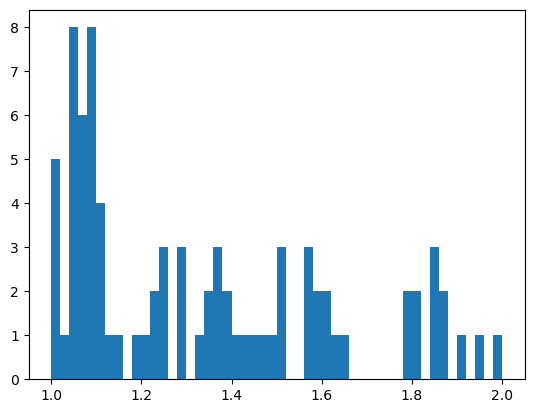

In [200]:
plt.hist(Z, bins=50)

## Estandarización

Estandarización
$$
Z=\frac{X-\bar{x}}{\sigma},
$$
donde $\bar{x}$ es la media aritmética del conjunto $X$ y $\sigma$ es su desviasión estándar.

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
est = StandardScaler()
Z = est.fit_transform(data.values.reshape(-1,1))

In [203]:
sp.stats.skew(Z, bias=False)

array([0.67892089])

In [204]:
Z.std()

1.0

In [205]:
Z.mean()

8.77213254024815e-17

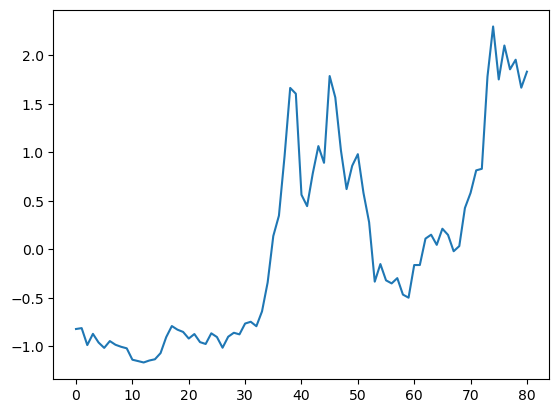

In [206]:
plt.plot(Z)

(array([5., 1., 8., 6., 8., 4., 1., 1., 0., 1., 1., 2., 3., 0., 3., 0., 1.,
        2., 3., 2., 1., 1., 1., 1., 1., 3., 0., 0., 3., 2., 2., 1., 1., 0.,
        0., 0., 0., 0., 0., 2., 2., 0., 3., 2., 0., 1., 0., 1., 0., 1.]),
 array([-1.16491897, -1.09569479, -1.02647062, -0.95724645, -0.88802227,
        -0.8187981 , -0.74957392, -0.68034975, -0.61112558, -0.5419014 ,
        -0.47267723, -0.40345306, -0.33422888, -0.26500471, -0.19578054,
        -0.12655636, -0.05733219,  0.01189199,  0.08111616,  0.15034033,
         0.21956451,  0.28878868,  0.35801285,  0.42723703,  0.4964612 ,
         0.56568538,  0.63490955,  0.70413372,  0.7733579 ,  0.84258207,
         0.91180624,  0.98103042,  1.05025459,  1.11947876,  1.18870294,
         1.25792711,  1.32715129,  1.39637546,  1.46559963,  1.53482381,
         1.60404798,  1.67327215,  1.74249633,  1.8117205 ,  1.88094467,
         1.95016885,  2.01939302,  2.0886172 ,  2.15784137,  2.22706554,
         2.29628972]),
 <BarContainer object

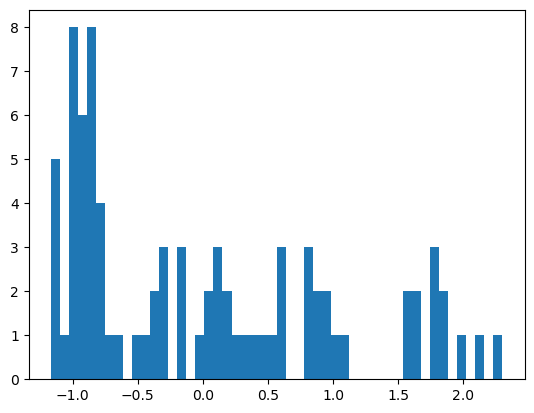

In [207]:
plt.hist(Z, bins=50)

## Outliers

### Tres Desviaciones estándar

In [208]:
sum(np.abs(sp.stats.zscore(data)) > 2)

2

In [209]:
data[(np.abs(sp.stats.zscore(data)) < 2)]

Date
2018-01-01    10221.099609
2018-02-01    10397.900391
2018-03-01     6973.529785
2018-04-01     9240.549805
2018-05-01     7494.169922
                  ...     
2024-04-01    60636.855469
2024-06-01    62678.292969
2024-07-01    64619.250000
2024-08-01    58969.898438
2024-09-01    62200.062500
Name: Adj Close, Length: 79, dtype: float64

### Quartiles (tukey fence)

1.5 (o 3) veces el rango intercuartílico

In [154]:
data = data.pct_change().dropna()
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
iqr

1.6634748472285112

In [155]:
tabla=pd.DataFrame(index=["remesas"])
tabla['L_Inferior']=q1-1.5*iqr
tabla['L_superior']=q3+1.5*iqr
tabla

,L_Inferior,L_superior
remesas,-4.341302,2.312597


In [156]:
tabla=pd.DataFrame(index=["remesas"])
tabla['L_Inferior']=q1-3*iqr
tabla['L_superior']=q3+3*iqr
tabla

,L_Inferior,L_superior
remesas,-6.836515,4.807809


In [157]:
data[data > q3+1.5*iqr]

Date
2018-11-01      6.833964
2019-04-01      3.665651
2021-05-01     16.824312
2023-03-01    659.355118
2023-10-01      6.143604
2024-02-01     57.210354
Name: Adj Close, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d81fc4dc10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d81fc4f410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d81fc4cfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d81fc54b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d81fc55590>],
 'means': []}

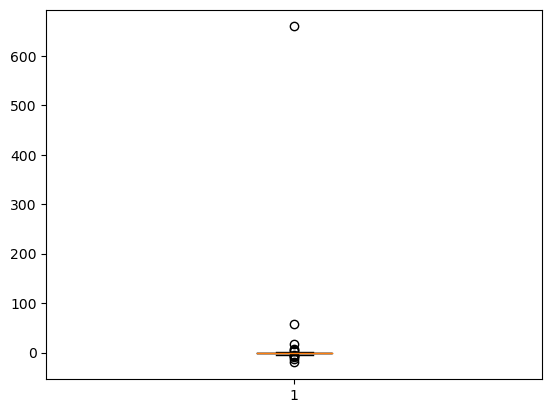

In [158]:
plt.boxplot(data)

Encuentra los valores atípicos usando el cambio porcentual de la serie o recortando la serie. ¿Llegas a la misma conclusión?

No, buscando los valores atipicos mediante el cambio porcentual encontrmamos 5 mas que en la otra serie uno en particular que llega a valores de 659. Esto se debe a que quiza no cambio mucho la distancia de valores de precio pero si su %

### sustitución de outliers

Después de encontrar los outliers, la labor es decidir que hacer con ellos. Puedes sustituir por la media, usar el periodo anterior, o el periodo estacional pasado.

In [219]:
data_copy = data.copy()
data_copy[data_copy > q3 + 3*iqr] = np.mean(data_copy)
data_copy

Date
2018-01-01    26302.376492
2018-02-01    26302.376492
2018-03-01    26302.376492
2018-04-01    26302.376492
2018-05-01    26302.376492
                  ...     
2024-05-01    26302.376492
2024-06-01    26302.376492
2024-07-01    26302.376492
2024-08-01    26302.376492
2024-09-01    26302.376492
Name: Adj Close, Length: 81, dtype: float64

Existen otros métodos para detectar valores atípicos. Consulta más en:

https://scikit-learn.org/stable/modules/outlier_detection.html

### Fechas importantes

In [243]:
data.pct_change().sort_values()

Date
2022-06-01   -0.377688
2018-11-01   -0.364116
2021-05-01   -0.353546
2018-03-01   -0.329333
2020-03-01   -0.251278
                ...   
2020-11-01    0.424123
2024-02-01    0.437169
2020-12-01    0.477732
2019-05-01    0.602493
2018-01-01         NaN
Name: Adj Close, Length: 81, dtype: float64

In [247]:
fecha_2019 = pd.Series(data = [1], index=["2019-05-01"])
fecha_2008 = pd.Series(data = [1], index=["2008-11-01"])
fecha_2020_3 = pd.Series(data = [1], index=["2020-03-01"])
fecha_2020_4 = pd.Series(data = [1], index=["2020-04-01"])

In [249]:
fecha_2019

2019-05-01    1
dtype: int64

In [246]:
data

Date
2018-01-01    10221.099609
2018-02-01    10397.900391
2018-03-01     6973.529785
2018-04-01     9240.549805
2018-05-01     7494.169922
                  ...     
2024-05-01    67491.414062
2024-06-01    62678.292969
2024-07-01    64619.250000
2024-08-01    58969.898438
2024-09-01    61974.781250
Name: Adj Close, Length: 81, dtype: float64

## Transformaciones matemáticas

### Logaritmo natural (log)

In [250]:
np.log(data).skew()

-0.18304789183768258

In [251]:
np.log(data).std()

0.8688953613959898

<Axes: xlabel='Date'>

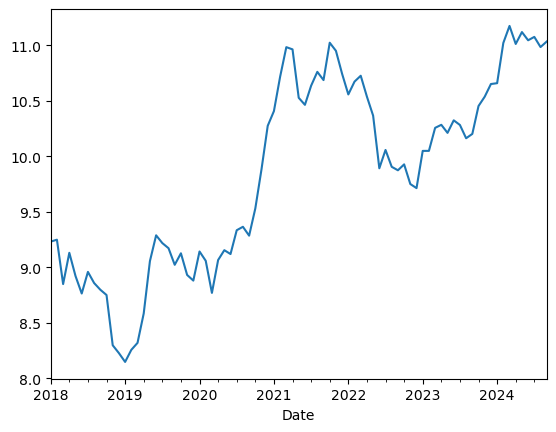

In [252]:
np.log(data).plot()

<Axes: >

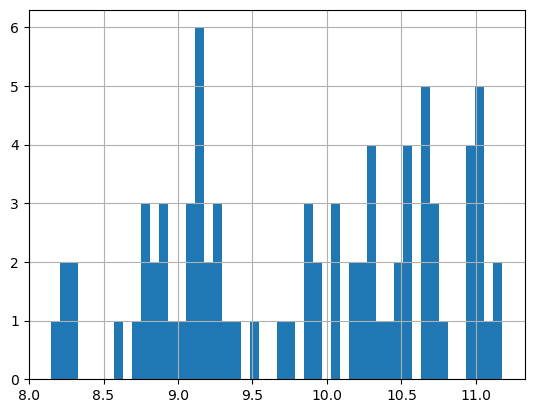

In [253]:
np.log(data).hist(bins=50)

### BoxCox

In [254]:
sp.stats.skew(sp.stats.boxcox(data)[0], bias=False)

-0.05207654848179244

In [255]:
np.std(sp.stats.boxcox(data)[0])

3.3201311524891053

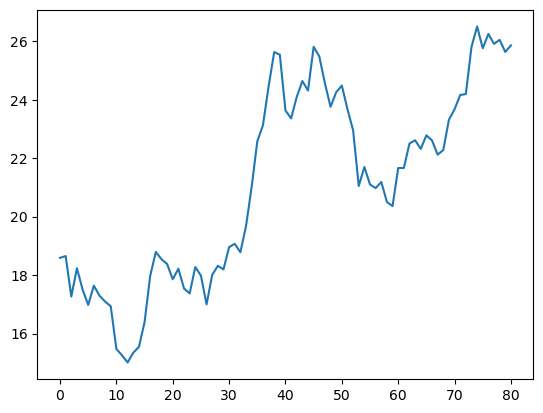

In [256]:
plt.plot(sp.stats.boxcox(data)[0])

(array([1., 2., 2., 0., 0., 1., 0., 0., 3., 3., 2., 2., 3., 3., 4., 3., 2.,
        2., 0., 0., 1., 0., 0., 2., 0., 1., 4., 0., 2., 1., 1., 2., 2., 3.,
        1., 1., 2., 3., 1., 3., 2., 4., 0., 0., 0., 2., 5., 2., 2., 1.]),
 array([15.01340416, 15.24320231, 15.47300046, 15.70279861, 15.93259676,
        16.16239491, 16.39219307, 16.62199122, 16.85178937, 17.08158752,
        17.31138567, 17.54118382, 17.77098197, 18.00078012, 18.23057827,
        18.46037643, 18.69017458, 18.91997273, 19.14977088, 19.37956903,
        19.60936718, 19.83916533, 20.06896348, 20.29876164, 20.52855979,
        20.75835794, 20.98815609, 21.21795424, 21.44775239, 21.67755054,
        21.90734869, 22.13714685, 22.366945  , 22.59674315, 22.8265413 ,
        23.05633945, 23.2861376 , 23.51593575, 23.7457339 , 23.97553205,
        24.20533021, 24.43512836, 24.66492651, 24.89472466, 25.12452281,
        25.35432096, 25.58411911, 25.81391726, 26.04371542, 26.27351357,
        26.50331172]),
 <BarContainer object

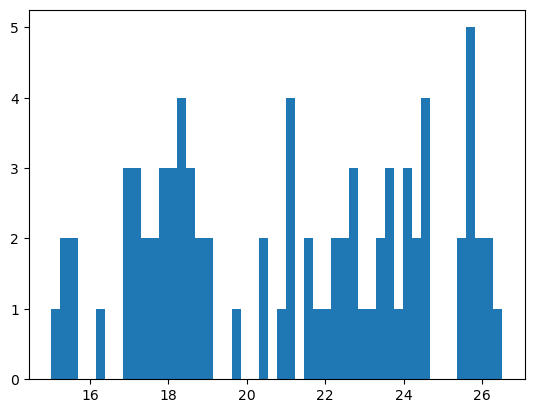

In [258]:
plt.hist(sp.stats.boxcox(data)[0], bins=50)

Tenemos valores por toda la tabla

In [259]:
sp.stats.boxcox(data)[1] #lambda

0.1373245020025931